# Задача классификации

## Введение в задачу классификации

Вы уже познакомились с машинным обучением на примере задачи регрессии. В этом разделе мы поговорим о еще одной популярной задаче в машинном обучении - **задаче классификации**.

Как вы помните, задача регрессии заключалась в том, чтобы предсказывать некоторое значение $y \in \mathbb{R}$ (принадлежащее множеству действительных чисел). Наши предсказания были непрерывными и могли принимать любые действительные значения.

Но что, если варианты наших предсказаний ограничены. Например мы работаем в банке и решаем задачу кредитного скоринга: хотим по данным клиента предсказать вернет ли он кредит или нет. Иными словами мы хотим **классифицировать** клиентов на тех кто вернет кредит и тех кто не вернет. Или, например, у нас есть изображение собачки, и мы хотим *классифицировать* ее породу. Хоть пород собак и достаточно много, но их количество все равно ограничено.  

Задача, где требуется предсказать класс из известного списка и называется **задачей классификации**.

В задаче кредитного скоринга у нас имеется клиент и 2 класса к которым мы можем его отнести (вернет/не вернет кредит). Задача в которой имеется всего 2 класса называется задачей **бинарной классификации**. Задача в которой имеется более двух классов, например классификация пород собак, когда у нас более двух пород, называется задачей **многоклассовой классификации** или **мульти-классификацией**.

### Постановка задачи

$X$ - множество описаний объектов (признаки)

$y$ - истинная метка класса для каждого объекта (обычно метки обозначаются целыми числами:..-2,-1,0,1,2,3...)

Как и в задаче регрессии, наша задача найти зависимость между $Х$ и $y$. То есть по имеющимся данным (обучающая выборка)<br> найти функцию $f(X) = y$, которая для любого объекта  $x \in X$, способна поставить метку класса $y$.

Далее для простоты будем рассматривать задачу *бинарной классификации*. Позже будет рассказано, как с помощью бинарной классификации перейти к многоклассовой.

### Пример

Обратимся к классическому примеру классификации - классификации цветков Ириса. Данные о цветках Ириса стали, в некотором роде, стандартным набором данных для задачи классификации. Впервые были использованы в 1936 году (**!**) Рональдом Фишером для демонстрации работы разработанного им метода дискриминантного анализа - прародителя многих методов машинного обучения.<br>

**Классификация цветков Ириса**

Требуется классифицировать цветки Ириса на два вида:

* iris setosa

* iris virginica

В качестве признаков рассмотрим два признака: длину и ширину чашелистика

In [1]:
from classification_helper import * # Подгружаем функции для визуализации

In [2]:
X, kind_iris = get_data()

$X$ - двумерный массив признаков

In [3]:
X.shape

(100, 2)

$kind\_iris$ - вектор истинных видов цветков (*target*)

In [4]:
kind_iris.shape

(100,)

In [5]:
print_data(X,kind_iris)

   Длина чашелистика Ширина чашелистика       Вид Ириса
0                5.1                3.5     iris setosa
1                4.9                3.0     iris setosa
2                4.7                3.2     iris setosa
3                4.6                3.1     iris setosa
4                5.0                3.6     iris setosa
5                5.4                3.9     iris setosa
6                4.6                3.4     iris setosa
7                5.0                3.4     iris setosa
8                4.4                2.9     iris setosa
9                4.9                3.1     iris setosa
10               5.4                3.7     iris setosa
11               4.8                3.4     iris setosa
12               4.8                3.0     iris setosa
13               4.3                3.0     iris setosa
14               5.8                4.0     iris setosa
15               5.7                4.4     iris setosa
16               5.4                3.9     iris

Первые 50 строчек таблицы соответсвуют виду iris setosa, остальные 50 iris virginica

Визуализируем данные

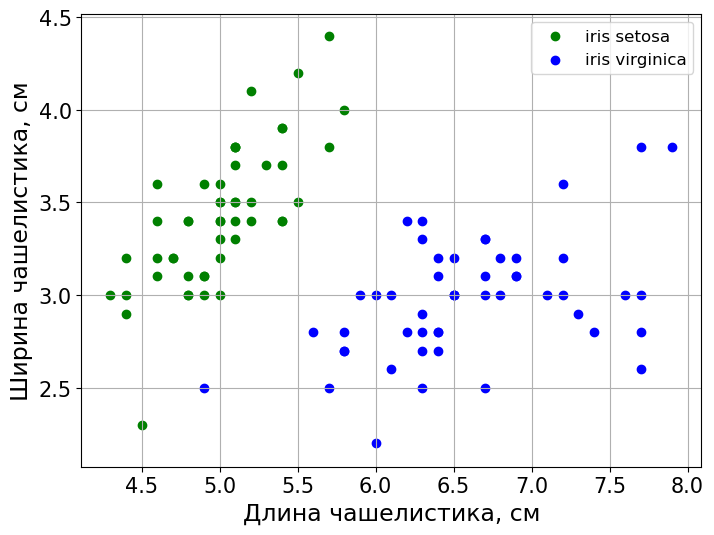

In [6]:
plot_data(X,kind_iris)

Как видим точки на графике разбросаны не совсем хаотично, а имеют некоторую структуру, значит существует зависимость между параметрами чашелистика и видом цветка Ириса.

Попробуем найти такую зависимость.